## Ingestion of NUTS3 version 2021 from Eurostat (gridsize 100m - projection EPSG:3035 - time 2021)

In [19]:
# Configure plots for inline use in Jupyter Notebook
%matplotlib inline

import datetime as dt

# Utilities
import boto3
import dateutil
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import rasterio
# Various utilities
import json
import xarray as xr
import shapely.geometry
import IPython.display
import zarr

# Sentinel Hub
from sentinelhub import (
    CRS,
    BBox,
    ByocCollection,
    ByocCollectionAdditionalData,
    ByocCollectionBand,
    ByocTile,
    DataCollection,
    DownloadFailedException,
    MimeType,
    SentinelHubBYOC,
    SentinelHubRequest,
    SHConfig,
    bbox_to_dimensions,
    os_utils,
)

config = SHConfig()
config.instance_id = os.environ.get("SH_INSTANCE_ID")
config.sh_client_id = os.environ.get("SH_CLIENT_ID")
config.sh_client_secret = os.environ.get("SH_CLIENT_SECRET")
config.aws_access_key_id = os.environ.get("username")
config.aws_secret_access_key = os.environ.get("password")

print ("START the work ......")
    
        

START the work ......


In [20]:

# Initialize SentinelHubBYOC class
byoc = SentinelHubBYOC(config=config)


#############################################################
name_of_your_collection = "nuts3_2021"
#############################################################



new_collection = ByocCollection(name=name_of_your_collection, s3_bucket="hub-fairicube0")
#byoc.delete_collection(new_collection) # for the delte of the collection
created_collection = byoc.create_collection(new_collection)
my_collection = byoc.get_collection(created_collection["id"])

#
#https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html#Create-new-collection
#Name: data/d001_administration/nuts_2021/NUTS2021_100m_1_1_B1.tif
input_folder ="data/d001_administration/nuts_2021"

tile_list = [
        "NUTS2021_100m_4_4_B1.tif",
        "NUTS2021_100m_3_4_B1.tif",
        "NUTS2021_100m_4_3_B1.tif",
        "NUTS2021_100m_5_5_B1.tif",
        "NUTS2021_100m_4_5_B1.tif",
        "NUTS2021_100m_3_3_B1.tif",
        "NUTS2021_100m_5_3_B1.tif",
        "NUTS2021_100m_3_5_B1.tif",
        "NUTS2021_100m_2_4_B1.tif",
        "NUTS2021_100m_5_4_B1.tif",
        "NUTS2021_100m_5_6_B1.tif",
        "NUTS2021_100m_2_5_B1.tif",
        "NUTS2021_100m_5_2_B1.tif",
        "NUTS2021_100m_2_2_B1.tif",
        "NUTS2021_100m_1_4_B1.tif",
        "NUTS2021_100m_4_6_B1.tif",
        "NUTS2021_100m_2_3_B1.tif",
        "NUTS2021_100m_4_2_B1.tif",
        "NUTS2021_100m_5_1_B1.tif",
        "NUTS2021_100m_4_1_B1.tif",
        "NUTS2021_100m_1_5_B1.tif",
        "NUTS2021_100m_3_2_B1.tif",
        "NUTS2021_100m_1_3_B1.tif",
        "NUTS2021_100m_5_7_B1.tif",
        "NUTS2021_100m_1_1_B1.tif",
        "NUTS2021_100m_1_2_B1.tif",
        "NUTS2021_100m_1_6_B1.tif",
        "NUTS2021_100m_2_1_B1.tif",
        "NUTS2021_100m_2_6_B1.tif",
        "NUTS2021_100m_3_1_B1.tif",
        "NUTS2021_100m_3_6_B1.tif",
        "NUTS2021_100m_4_7_B1.tif",
        "NUTS2021_100m_6_1_B1.tif",
        "NUTS2021_100m_6_2_B1.tif",
        "NUTS2021_100m_6_4_B1.tif",
        "NUTS2021_100m_6_3_B1.tif",
        "NUTS2021_100m_6_5_B1.tif",
        "NUTS2021_100m_6_6_B1.tif",
        "NUTS2021_100m_1_7_B1.tif",
        "NUTS2021_100m_2_7_B1.tif",
        "NUTS2021_100m_3_7_B1.tif",
        "NUTS2021_100m_6_7_B1.tif"
            ]

##Name: NUTS2021_100m_1_1_B1.tif
for tile in tile_list:
    tile_part_l = tile.split("_")
    tile_part =tile_part_l[0]+"_"+tile_part_l[1]+"_"+tile_part_l[2]+"_"+tile_part_l[3]+"_(BAND).tif"
    #tile_part =  tile[:33]+"(BAND).tif"
    print(tile_part)

    input_raster_file=tile_part
    path_link = input_folder+"/"+input_raster_file  
    #print ("path link = " + path_link
    new_tile= ByocTile(path=path_link) 
    created_tile = byoc.create_tile(created_collection, new_tile)
    tile = byoc.get_tile(collection=created_collection["id"], tile=created_tile["id"])
    tile
##print (my_collection)




print ("END-------------------------------------------------")

NUTS2021_100m_4_4_(BAND).tif
NUTS2021_100m_3_4_(BAND).tif
NUTS2021_100m_4_3_(BAND).tif
NUTS2021_100m_5_5_(BAND).tif
NUTS2021_100m_4_5_(BAND).tif
NUTS2021_100m_3_3_(BAND).tif
NUTS2021_100m_5_3_(BAND).tif
NUTS2021_100m_3_5_(BAND).tif
NUTS2021_100m_2_4_(BAND).tif
NUTS2021_100m_5_4_(BAND).tif
NUTS2021_100m_5_6_(BAND).tif
NUTS2021_100m_2_5_(BAND).tif
NUTS2021_100m_5_2_(BAND).tif
NUTS2021_100m_2_2_(BAND).tif
NUTS2021_100m_1_4_(BAND).tif
NUTS2021_100m_4_6_(BAND).tif
NUTS2021_100m_2_3_(BAND).tif
NUTS2021_100m_4_2_(BAND).tif
NUTS2021_100m_5_1_(BAND).tif
NUTS2021_100m_4_1_(BAND).tif
NUTS2021_100m_1_5_(BAND).tif
NUTS2021_100m_3_2_(BAND).tif
NUTS2021_100m_1_3_(BAND).tif
NUTS2021_100m_5_7_(BAND).tif
NUTS2021_100m_1_1_(BAND).tif
NUTS2021_100m_1_2_(BAND).tif
NUTS2021_100m_1_6_(BAND).tif
NUTS2021_100m_2_1_(BAND).tif
NUTS2021_100m_2_6_(BAND).tif
NUTS2021_100m_3_1_(BAND).tif
NUTS2021_100m_3_6_(BAND).tif
NUTS2021_100m_4_7_(BAND).tif
NUTS2021_100m_6_1_(BAND).tif
NUTS2021_100m_6_2_(BAND).tif
NUTS2021_100m_

In [21]:
#############################################################
#name_of_your_collection = name_of_your_collection
name_of_your_collection = "nuts3_2021"
#############################################################

print ("START....")
# Initialize SentinelHubBYOC class
byoc = SentinelHubBYOC(config=config)
print ("START--------------------------")
# list collections and tiles
# from: https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html


collections_iterator = byoc.iter_collections(name_of_your_collection)
my_collections = list(collections_iterator)[0]


data_collection = DataCollection.define_byoc(my_collections["id"])
data_collection

#'UrbanAtlas2018_10m_raster_v1'
#Collection id:  27c95f8f-fb6b-46f2-8f84-2ce7761eeccd
#DataCollection.BYOC_27c95f8f-fb6b-46f2-8f84-2ce7761eeccd
print("Collection name:", my_collections["name"])
print("Collection id: ", my_collections["id"])
tiles = list(byoc.iter_tiles(my_collections))
for tile in tiles:
        print("Tile status: ", tile['status'])
        print("Tile created: ", tile['created'])
        

print ("END----------------------------------------------------------")

#byoc.delete_collection(my_collections)


#xx error hello world
##for collection in my_collections:   
 # byoc.delete_collection(collection)
#print ("end")

START....
START--------------------------
Collection name: nuts3_2021
Collection id:  81a17892-38ff-470a-ae46-b64313acd7b3
Tile status:  WAITING
Tile created:  2023-03-07T14:15:16.070355Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:13.104878Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:14.546085Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:13.428205Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:13.984935Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:15.517114Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:13.207884Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:14.442667Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:12.522336Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:13.540532Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:13.755969Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:14.098047Z
Tile status:  WAITING
Tile created:  2023-03-07T14:15:12.282162Z
Tile status:  WAITING
Tile creat

Image shape at 10 m resolution: (2480, 574) pixels
[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


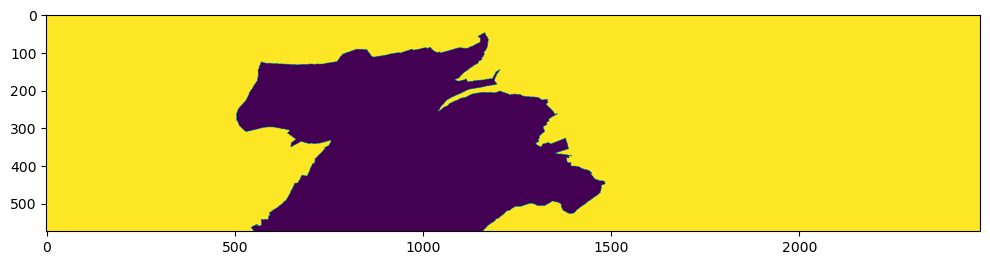

In [13]:
## plotting test box of you data
x1 = 6.0  # degree
y1 = 49.60  # degree
x2 = 6.34 # degree
y2 = 49.66  # degree

bbox = x1, y1, x2, y2
aoi = BBox([x1, y1, x2, y2], crs=CRS.WGS84)
#spatial_res = 0.00018   # = 20.038 meters in degree
resolution = 10

bbox_size = bbox_to_dimensions(aoi, resolution=resolution)
print(f"Image shape at {resolution} m resolution: {bbox_size} pixels")

IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)
#https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html
#https://eurodatacube.com/notebooks/contributions/LPIS_LULC-Slo.ipynb



evalscript_test = """

//VERSION=3
function setup() {
  return {
    input: ["B1"],
    output: { 
        bands: 1 ,
        sampleType: "UINT16" // raster format will be UINT16
        }
    
  };
}

function evaluatePixel(sample) {
  return [sample.B1];
}
"""

request = SentinelHubRequest(
        evalscript=evalscript_test,
        input_data=[
            SentinelHubRequest.input_data(
                #data_collection=data_collection,
                data_collection=data_collection,
                #time_interval=tile_time
                # time_interval="2018"
                
            )
        ],
        responses=[
            SentinelHubRequest.output_response('default', MimeType.PNG)
        ],
        bbox=aoi,
        size=bbox_to_dimensions(aoi, 10),
        config=config
    )
data = request.get_data()[0]

print (data)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data)
# ax.set_title(tile_time.date().isoformat(), fontsize=10)
plt.tight_layout()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


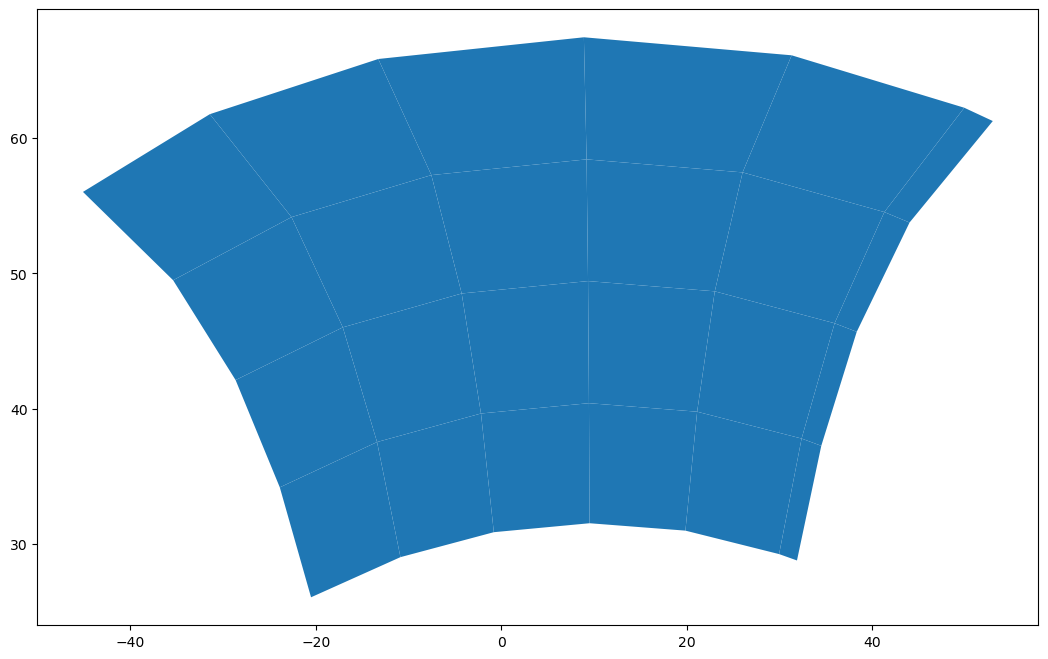

In [15]:
tile_iterator = byoc.iter_tiles(created_collection)

tiles_for_visualized = []
for i in range(24):
    print(i)
    tiles_for_visualized.append(ByocTile.from_dict(next(tile_iterator)))
   
tiles_gdf = gpd.GeoDataFrame(
    tiles_for_visualized,
    geometry=[t.cover_geometry.transform(CRS.WGS84).geometry for t in tiles_for_visualized],
    crs="epsg:4326",
)
tiles_gdf.head()
fig, ax = plt.subplots(figsize=(17, 8))
tiles_gdf.plot(ax=ax);